<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/Portifolio/blob/main/Practical_Challenge_(MBA_XPinc)_Business_Intelligence_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arvores de decisão

In [ ]:
!pip install imblearn
!pip install graphviz

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [ ]:
df = pd.read_csv('diabetes.csv', sep = ';')
df.info() #informações basicas df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gravidez                768 non-null    int64  
 1   glicose                 768 non-null    int64  
 2   pressao_sangue          768 non-null    int64  
 3   espessura_pele          768 non-null    int64  
 4   insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   predisposicao_diabetes  768 non-null    float64
 7   idade                   768 non-null    int64  
 8   diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head() #verificando df

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe() #verificando estatisticas basicas do df

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum() #vefrificando se tem valor nulo

gravidez                  0
glicose                   0
pressao_sangue            0
espessura_pele            0
insulina                  0
IMC                       0
predisposicao_diabetes    0
idade                     0
diabetes                  0
dtype: int64

In [ ]:
df.groupby(['diabetes'])['diabetes'].count() #le-se agrupe por diabetes a coluna diabetes.
#neste caso aqui conseguimos observar um desbalanceamento dos dados.

diabetes
0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
#Separando o conjunto de dados features:
X_dados = df.drop('diabetes', axis=1).values
X_dados

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#Separando o target
y_dados = df['diabetes'].values
y_dados

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
#Criando a função para balancear os dados
def balanceamento_dados (X_dados, y_dados):
  undersample = RandomUnderSampler(random_state=42)
  X_under, y_under = undersample.fit_resample(X_dados, y_dados)

  tl = TomekLinks(sampling_strategy='all')

  X_under, y_under = tl.fit_resample(X_under, y_under)
  return X_under, y_under

#aplicando a tecnica de balanceamento na base de dados
X_dados_balanceados, y_dados_balanceados = balanceamento_dados (X_dados, y_dados)


In [ ]:
print(len(X_dados_balanceados))
print(len(y_dados_balanceados))

456
456


In [ ]:
import collections
print(collections.Counter(y_dados_balanceados))

Counter({0: 228, 1: 228})


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def separa_treino_teste(X_dados_balanceados, y_dados_balanceados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados,
                                                        y_dados_balanceados,
                                                        random_state=42,
                                                        test_size=0.2)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = separa_treino_teste(X_dados_balanceados, y_dados_balanceados)


In [ ]:
len(y_train)

364

In [ ]:
from sklearn import tree
algoritmo_arvore = tree.DecisionTreeClassifier()
modelo = algoritmo_arvore.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(modelo.feature_importances_)

[0.05980665 0.4048686  0.05488635 0.04400862 0.05105089 0.16737118
 0.05679675 0.16121096]


In [ ]:
df.columns

Index(['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade', 'diabetes'],
      dtype='object')

In [ ]:
#A glicose é o que mais mais explica.
def gera_features_importantes(modelo):
  pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
              index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
        'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)

In [ ]:
modelo.classes_

array([0, 1])

In [ ]:
nome_features = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade']

nome_classes = ['NÃO DIABETICO', 'DIABETICO']

In [ ]:
import graphviz
def visualiza_arvore(modelo):
  arvore = tree.export_graphviz(modelo,
                                feature_names=nome_features,
                                class_names = nome_classes,
                                rounded = True,
                                special_characters=True, filled=True)
  graph = graphviz.Source(arvore)
  return graph

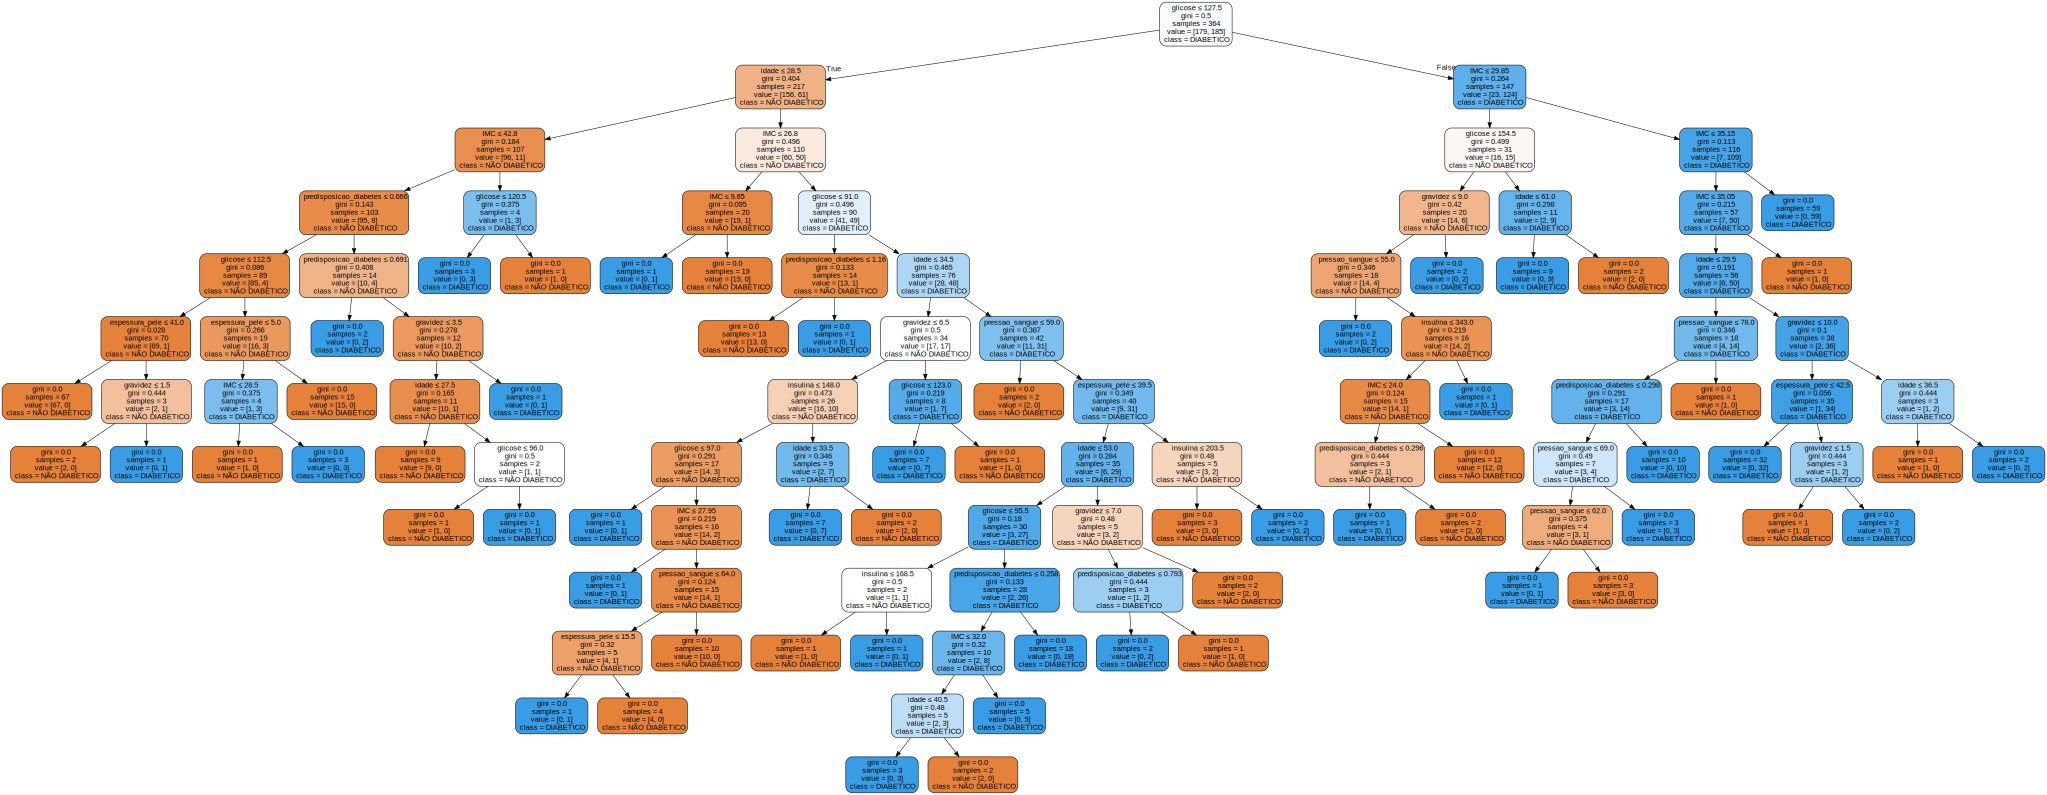

In [ ]:
visualiza_arvore(modelo)

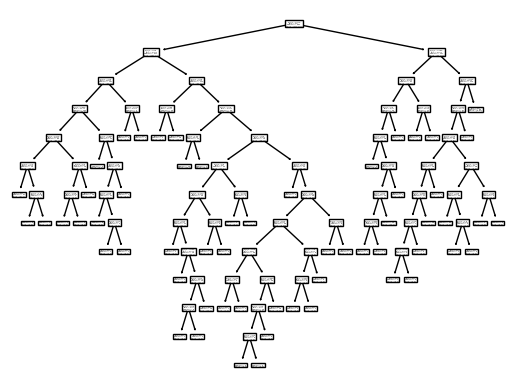

In [ ]:
import matplotlib.pyplot as plt
tree.plot_tree(modelo)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7282608695652174

In [ ]:
print(gera_features_importantes(modelo))

None


#Random Forest

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df2 = pd.read_csv('diabetes.csv', sep = ';')
df2

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df2.groupby(['diabetes'])['diabetes'].count()

diabetes
0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
X_dados = df2.drop('diabetes', axis=1).values
y_dados = df2['diabetes']

In [ ]:
#Criando a função para balancear os dados
def balanceamento_dados (X_dados, y_dados):
  undersample = RandomUnderSampler(random_state=42)
  X_under, y_under = undersample.fit_resample(X_dados, y_dados)

  tl = TomekLinks(sampling_strategy='all')

  X_under, y_under = tl.fit_resample(X_under, y_under)
  return X_under, y_under

#aplicando a tecnica de balanceamento na base de dados
X_dados_balanceados, y_dados_balanceados = balanceamento_dados (X_dados, y_dados)

In [ ]:
def sep_treino_teste (X_dados_balanceados, y_dados_balanceados):
  X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados,
                                                      y_dados_balanceados,
                                                      random_state=42, test_size=0.2)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = sep_treino_teste(X_dados_balanceados, y_dados_balanceados)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(random_state=42) #criação do classificador
modelo = classifier.fit(X_train, y_train) #modelo de classificação
y_predict = modelo.predict(X_test) #realização de predições no y predict

In [ ]:
pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
              index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
        'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)

,importancia
glicose,0.328321
IMC,0.156818
idade,0.140994
predisposicao_diabetes,0.104080
gravidez,0.080038
pressao_sangue,0.074558
insulina,0.059152
espessura_pele,0.056039


In [ ]:
#calculo acuracia do modelo
acuracia = accuracy_score(y_test, y_pred)
print('Precisão', acuracia)

Precisão 0.7282608695652174


#Avaçiação de desempenho - Matriz de confusão

In [ ]:
!pip install seaborn
!pip install matplotlib

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix (y_test, y_pred)

In [ ]:
labels=['não possui diabetes', 'possui diabetes']

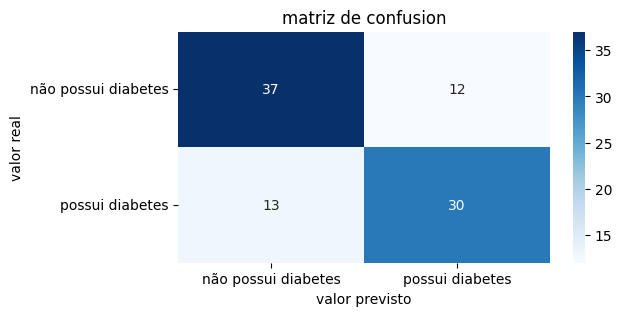

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
            annot=True,
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('valor previsto')
plt.ylabel('valor real')
plt.title('matriz de confusion')
plt.show()

In [ ]:
#metricas
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.71      0.70      0.71        43

    accuracy                           0.73        92
   macro avg       0.73      0.73      0.73        92
weighted avg       0.73      0.73      0.73        92

